In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("winequality-white.csv",sep=';')
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [3]:
print(data.shape)
data.info()

(4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data.drop('free sulfur dioxide',axis=1,inplace=True)
data.drop('citric acid',axis=1,inplace=True)

In [7]:
quality = data["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")
category = pd.DataFrame(data=category, columns=["category"])
dataf = pd.concat([data, category], axis=1)
dataf.drop(columns="quality", axis=1, inplace=True)

X = dataf.drop('category',axis=1)

y = dataf['category']

In [77]:

y[0:10]

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
5    Medium
6    Medium
7    Medium
8    Medium
9    Medium
Name: category, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19aa8f28>]],
      dtype=object)

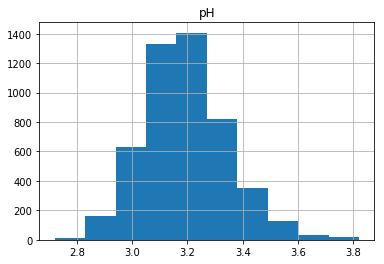

In [11]:
dataf.hist('pH')

In [78]:

# sns.set_style("whitegrid");
# sns.pairplot(dataf, hue="category", size=10);
# plt.show()

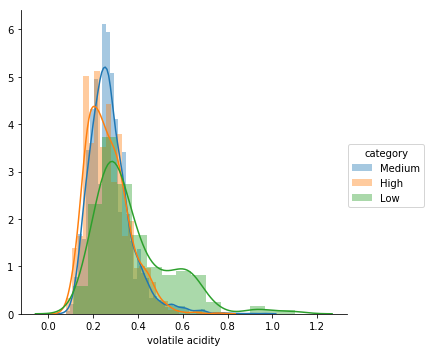

In [62]:
sns.FacetGrid(dataf, hue="category", size=5) \
   .map(sns.distplot, "volatile acidity") \
   .add_legend();
plt.show(); 

In [79]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [80]:
X=data.drop('quality',axis=1)

In [81]:
X.shape

(4898, 11)

In [66]:
y.shape

(4898,)

In [82]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [83]:
print(X_train.shape,X_test.shape,y_train.shape)

(3918, 11) (980, 11) (3918,)


In [173]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [174]:
y_pred = svclassifier.predict(X_test)

In [175]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [176]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

0.821875
[[  0   0  42]
 [  0   0  15]
 [  0   0 263]]
             precision    recall  f1-score   support

       High       0.00      0.00      0.00        42
        Low       0.00      0.00      0.00        15
     Medium       0.82      1.00      0.90       263

avg / total       0.68      0.82      0.74       320



In [69]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
y_pred = svclassifier.predict(X_test)  
print(accuracy_score(y_test,y_pred))

0.7755102040816326


In [65]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[  8   0  28]
 [  0   0  13]
 [  5   0 266]]
             precision    recall  f1-score   support

       High       0.62      0.22      0.33        36
        Low       0.00      0.00      0.00        13
     Medium       0.87      0.98      0.92       271

avg / total       0.80      0.86      0.82       320



In [190]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [191]:
y_pred = svclassifier.predict(X_test)  
print(accuracy_score(y_test,y_pred))

0.84375


In [68]:
#taking a lot of time!!!


# from sklearn.svm import SVC  
# svclassifier = SVC(kernel='poly',degree=8)  
# svclassifier.fit(X_train, y_train) 
# y_pred = svclassifier.predict(X_test)  
# print(accuracy_score(y_test,y_pred))

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [256]:
print(scaler.fit(X_train))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [257]:
print(scaler.mean_)

[ 8.33158718  0.52831118  2.56884285  0.08710711 46.2494136   0.99676825
  3.31043002  0.65673182 10.44035705]


In [258]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


y_pred = svclassifier.predict(X_test)



print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

0.821875
[[  0   0  42]
 [  0   0  15]
 [  0   0 263]]
             precision    recall  f1-score   support

       High       0.00      0.00      0.00        42
        Low       0.00      0.00      0.00        15
     Medium       0.82      1.00      0.90       263

avg / total       0.68      0.82      0.74       320



In [86]:
scaled=scaler.fit_transform(X_train)

In [88]:
X_train=pd.DataFrame(scaled,columns=['fixed acidity','volatile acidity','citric acid','residual sugar',
                                     'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])




In [89]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)


y_pred = svclassifier.predict(X_test)



print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

0.7642857142857142
[[  0   0 202]
 [  0   0  29]
 [  0   0 749]]
             precision    recall  f1-score   support

       High       0.00      0.00      0.00       202
        Low       0.00      0.00      0.00        29
     Medium       0.76      1.00      0.87       749

avg / total       0.58      0.76      0.66       980

